In [1]:
import matplotlib.pyplot as plt
import lakeview as lv

In [2]:
import gzip

REFSEQ_GFF_PATH = (
    "/workspace/lakeview/tests/data/Refseq_GRCh37_genomic_annotation.gff.gz"
)

START, END = 6.643e6, 6.648e6

with gzip.open(REFSEQ_GFF_PATH, "rt") as f:
    gene_painter = lv.GeneAnnotation.from_refseq_gff(
        file_object=f, build='GRCh37', chromosome="chr12",  start=START, end=END
    )

NC_000012.11


In [3]:
len(gene_painter.transcripts)

6

In [4]:
gene_painter.transcripts

[AnnotationRecord(sequence_name='NC_000012.11', source='BestRefSeq', feature='transcript', start=6643683, end=6647537, score=None, strand='+', frame=None, attributes={'ID': 'rna-NR_152150.2', 'Parent': 'gene-GAPDH', 'Dbxref': ['GeneID:2597', 'Genbank:NR_152150.2', 'HGNC:HGNC:4141', 'MIM:138400'], 'Name': 'NR_152150.2', 'gbkey': 'misc_RNA', 'gene': 'GAPDH', 'product': 'glyceraldehyde-3-phosphate dehydrogenase%2C transcript variant 6', 'transcript_id': 'NR_152150.2'}, id='rna-NR_152150.2', parent=None),
 AnnotationRecord(sequence_name='NC_000012.11', source='BestRefSeq', feature='mRNA', start=6643683, end=6647537, score=None, strand='+', frame=None, attributes={'ID': 'rna-NM_001289746.2', 'Parent': 'gene-GAPDH', 'Dbxref': ['GeneID:2597', 'Genbank:NM_001289746.2', 'HGNC:HGNC:4141', 'MIM:138400'], 'Name': 'NM_001289746.2', 'gbkey': 'mRNA', 'gene': 'GAPDH', 'product': 'glyceraldehyde-3-phosphate dehydrogenase%2C transcript variant 4', 'transcript_id': 'NM_001289746.2'}, id='rna-NM_001289746

In [5]:
gene_painter.transcripts[0].id

'rna-NR_152150.2'

In [6]:
gene_painter.exons

[AnnotationRecord(sequence_name='NC_000012.11', source='BestRefSeq', feature='exon', start=6643683, end=6643735, score=None, strand='+', frame=None, attributes={'ID': 'exon-NR_152150.2-1', 'Parent': 'rna-NR_152150.2', 'Dbxref': ['GeneID:2597', 'Genbank:NR_152150.2', 'HGNC:HGNC:4141', 'MIM:138400'], 'gbkey': 'misc_RNA', 'gene': 'GAPDH', 'product': 'glyceraldehyde-3-phosphate dehydrogenase%2C transcript variant 6', 'transcript_id': 'NR_152150.2'}, id=None, parent='rna-NR_152150.2'),
 AnnotationRecord(sequence_name='NC_000012.11', source='BestRefSeq', feature='exon', start=6643976, end=6644027, score=None, strand='+', frame=None, attributes={'ID': 'exon-NR_152150.2-2', 'Parent': 'rna-NR_152150.2', 'Dbxref': ['GeneID:2597', 'Genbank:NR_152150.2', 'HGNC:HGNC:4141', 'MIM:138400'], 'gbkey': 'misc_RNA', 'gene': 'GAPDH', 'product': 'glyceraldehyde-3-phosphate dehydrogenase%2C transcript variant 6', 'transcript_id': 'NR_152150.2'}, id=None, parent='rna-NR_152150.2'),
 AnnotationRecord(sequence_n

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


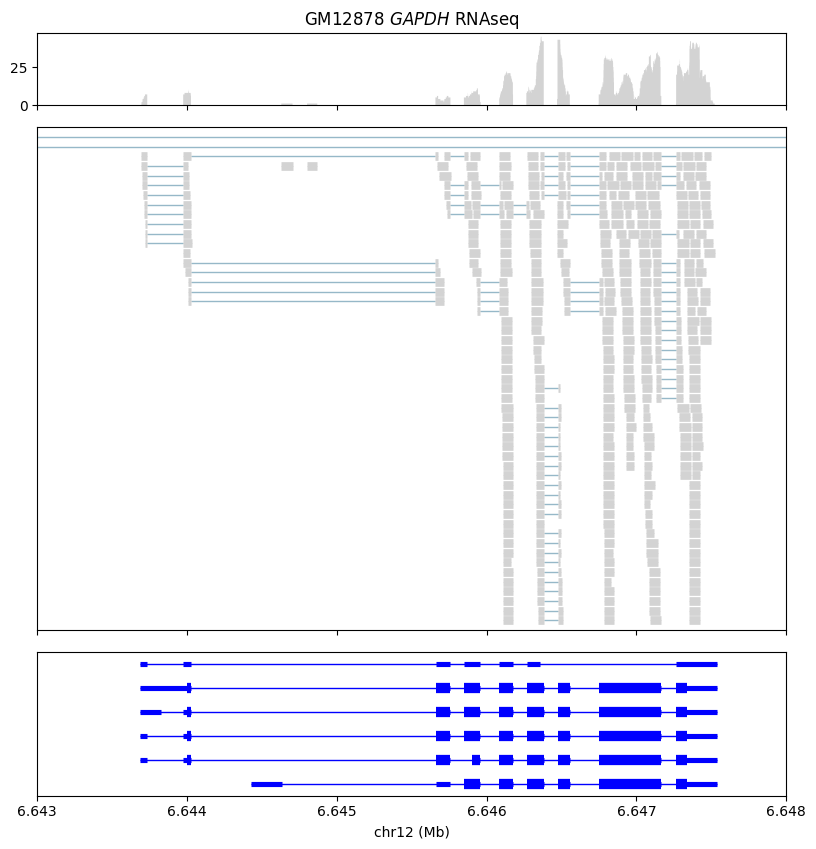

In [7]:
RNA_BAM_PATH = "/workspace/lakeview/tests/data/GM12878_RNAseq_GAPDH.sample=0.002.bam"

p = lv.SequenceAlignment.from_file(RNA_BAM_PATH, "rb")
gv = lv.GenomeViewer(3, figsize=(8, 8), height_ratios=(1, 7 ,2))
p.draw_pileup(gv.axes[0], show_mismatches=False)
p.draw_alignment(
    gv.axes[1],
    show_arrowheads=False,
    show_soft_clipping=False,
    show_mismatches=True,
    max_group_height=50,
    show_group_labels=False,
    show_group_separators=False,
)

gene_painter.draw_transcripts(gv.axes[2])

gv.set_xlim(6.643e6, 6.648e6)
gv.set_xlabel("chr12 (Mb)")
gv.axes[-1].xaxis.set_major_formatter(lv.util.base_formatter(unit="mb", fmt="{:.3f}"))
gv.set_title("GM12878 $\it{GAPDH}$ RNAseq")

[0.0, 1.0, 2.0, 3.0, -inf, -inf, 3.0, -inf, -inf, -inf, -inf, -inf, 2.0, -inf, 0.0, 1.0, 2.0, 3.0, -inf, -inf, 0.0, -inf, 1.0, 2.0, 3.0, -inf, -inf, 0.0, -inf, 0.0, -inf, -inf, -inf, -inf, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, -inf, 0.0, 0.0, 1.0, 2.0, 3.0, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 2.0, 0.0, -inf, 3.0, -inf, -inf, -inf, -inf, 0.0, 1.0, -inf, 1.0, 2.0, 2.0, 0.0, 1.0, 0.0, 1.0, -inf, -inf, 2.0, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 0.0, 3.0, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 2.0, 2.0, 3.0, 1.0, -inf, 0.0, 3.0, -inf, -inf, -inf, 3.0, -inf, -inf, 1.0, 1.0, -inf, 2.0, -inf, 2.0, 0.0, -inf, 2.0, 0.0, -inf, -inf, 3.0, -inf, -inf, -inf, 1.0, 0.0, 2.0, 2.0, 3.0, 0.0, 1.0, 1.0, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 0.0, -inf, 0.0, 0.0, -inf, -inf, 1.0, 2.0, 3.0, -inf, -inf, 3.0, 0.0, -inf, -inf, -inf, 1.0, 2.0, -inf, 2.0, -inf, 0.0, 0.0, -inf, 1.0, 2.0, -inf, 3.0, -inf, -inf, 0.0,

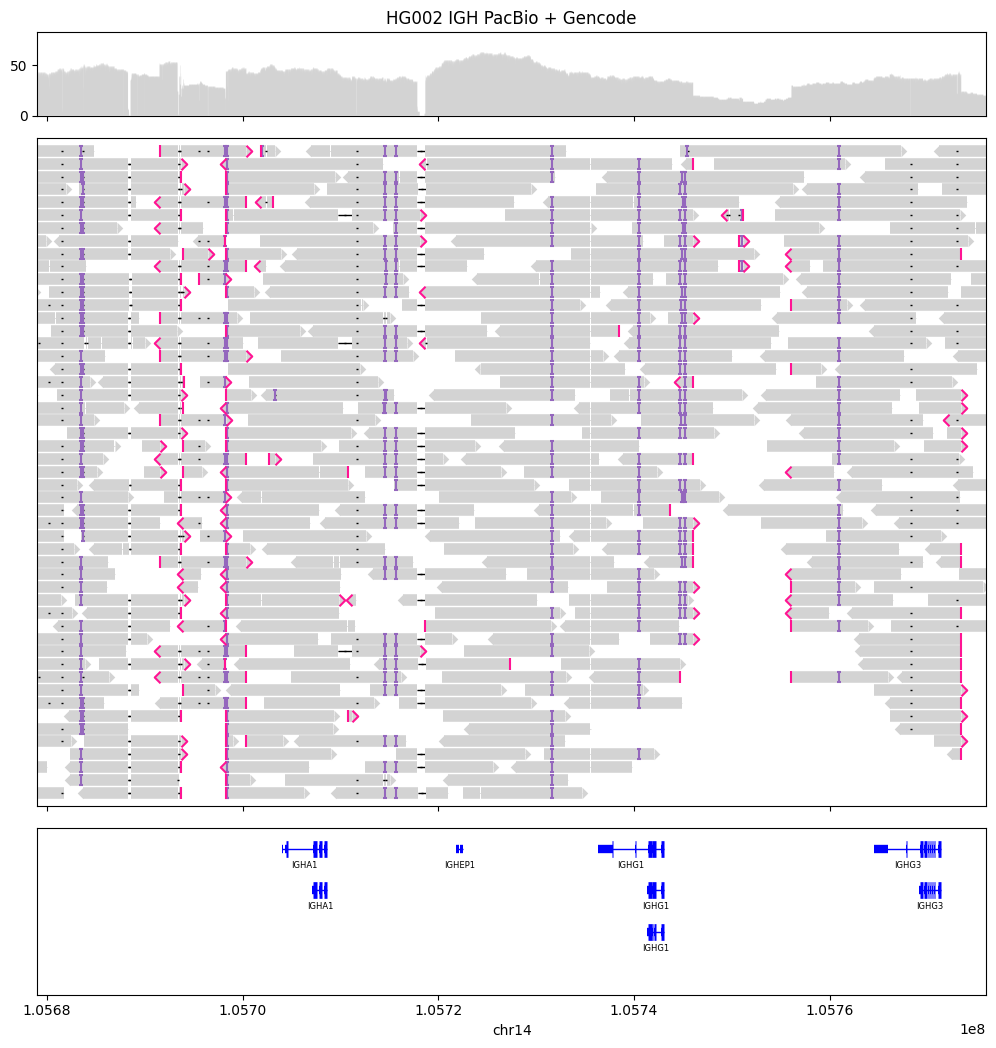

In [3]:
CHROMOSOME = "chr14"
START = 104586347
END = 107043718
GENCODE_GTF_PATH = "/workspace/lakeview/tests/data/gencode.v40.annotation.gtf.gz"
PACBIO_BAM_PATH = "/workspace/lakeview/tests/data/HG002_IGH_PacBio_CCS.bam"
OUTPUT_PNG_PATH = "/workspace/lakeview/tests/output/IGH_PacBio_Gencode.png"

with gzip.open(GENCODE_GTF_PATH, "rt") as f:
    gencode_painter = lv.GeneAnnotation.from_gencode_gtf(
        file_object=f,
        chromosome=CHROMOSOME,
        start=START,
        end=END,
    )
pacbio_painter = lv.SequenceAlignment.from_file(PACBIO_BAM_PATH, "rb")

gv = lv.GenomeViewer(3, height_ratios=(1, 8, 2))
pacbio_painter.draw_pileup(
    gv.axes[0],
    show_mismatches=False,
)
pacbio_painter.draw_alignment(
    gv.axes[1],
    show_mismatches=False,
    sort_by=lambda seg: -seg.query_alignment_length,
    max_group_height=50,
)
gencode_painter.draw_transcripts(
    gv.axes[2], max_group_height=4, label_by=lambda t: t.attributes["gene_name"],
    sort_by=lambda t: -len(t)
)

gv.set_xlim((105679000, 105776000))
gv.set_xlabel(CHROMOSOME)
gv.set_title("HG002 IGH PacBio + Gencode")

In [4]:
CHROMOSOME = "chr14"
START = 104586347
END = 107043718

with gzip.open(GENCODE_GTF_PATH, "rt") as f:
    gencode_painter = lv.GeneAnnotation.from_gencode_gtf(
        file_object=f,
        chromosome=CHROMOSOME,
        start=START,
        end=END,
    )

In [9]:
features = set()
names = set()
with gzip.open(GENCODE_GTF_PATH, 'rt') as file_object:
    for line in file_object:
        if line.startswith("#"):
            continue
        data = line.strip("\n").split("\t")
        seqname = data[0]
        names.add(seqname)
        source = data[1]
        feature = data[2]
        features.add(feature)

In [10]:
features

{'CDS',
 'Selenocysteine',
 'UTR',
 'exon',
 'gene',
 'start_codon',
 'stop_codon',
 'transcript'}

In [11]:
names

{'chr1',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr2',
 'chr20',
 'chr21',
 'chr22',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chrM',
 'chrX',
 'chrY'}